# Project Title: 1.1.5. Sales Forecasting

## Task: Loading Datasets, Data Exploration, Time Series Decomposition, and ARIMA Forecasting

### Import Necessary Libraries

- **Pandas:** Used for data manipulation and analysis, essential for handling structured data and merging datasets efficiently.
- **Matplotlib:** Provides basic plotting functionalities, useful for creating static, interactive, and animated visualizations in Python.
- **Seaborn:** Built on top of Matplotlib, Seaborn enhances visualizations with attractive and informative statistical graphics.
- **statsmodels.tsa.arima.model:** Implements time series analysis and forecasting models, including ARIMA (AutoRegressive Integrated Moving Average).
- **sklearn.metrics:** Contains metrics for model evaluation, such as mean squared error (MSE), crucial for assessing forecast accuracy.
- **Numpy:** Offers support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
- **statsmodels.tsa.seasonal:** Facilitates seasonal decomposition of time series data, allowing separation into trend, seasonal, and residual components.

### Load Datasets

- **Training Data:** The primary dataset ('train.csv') containing historical sales data per store and day.
- **Store Information:** Supplementary dataset ('store.csv') providing additional details about each store (e.g., size, type, competition distance).

### Merge Datasets

- **Merge Operation:** Combined the training data with store information using the 'Store' column as a key. This consolidation allows for comprehensive analysis combining sales data with store-specific attributes.

### Display Basic Information about the Merged Dataset

- **Dataset Exploration:** Utilized the `.info()` method to obtain an overview of the merged dataset's structure, including column names, data types, and presence of missing values. Understanding these aspects is crucial for data preprocessing and ensuring data integrity throughout the analysis.

### Display the First Few Rows of the Merged Dataset

- **Initial Data Inspection:** Displayed the first few rows of the merged dataset using `.head()` to gain initial insights into the dataset's content, verify data alignment post-merge, and identify any immediate data anomalies or issues that require attention.

### Handle Missing Values

- **Handling Strategies:**
  - **Competition Distance:** Imputed missing values with the median distance, assuming a typical scenario where missing values could indicate a lack of precise information rather than zero distance.
  - **Competition Open Since:** Filled missing values with zeros, under the assumption that NaNs denote no recorded competition opening data.
  - **Promo2 Since:** Applied zero-filling for missing values, presuming NaNs indicate no Promo2 promotion program.
  - **Promo Interval:** Imputed missing values with 'None', assuming absence of defined promotional intervals where NaNs are present.
  - **State Holiday:** Filled NaNs with zeros, assuming absence of state holidays rather than undefined data.
  - **School Holiday:** Imputed missing values with zeros, assuming no school holiday if the data is undefined.

### Convert Date Column to Datetime Type

- **Date Conversion:** Transformed the 'Date' column into a datetime format using `pd.to_datetime()` to facilitate time-based analysis and enable accurate chronological plotting and time series decomposition.

### Aggregate Sales Data by Date

- **Aggregation Process:** Utilized `.groupby('Date')['Sales'].sum()` to aggregate sales data by date, consolidating daily sales figures into a time series dataset. This aggregation sets the stage for further temporal analysis and forecasting tasks.

### Set Date Column as Index for Time Series Analysis

- **Index Assignment:** Assigned the 'Date' column as the index of the dataset using `.set_index('Date')` to convert the data into a time series format. This indexing facilitates seamless integration with time series analysis tools and enables straightforward manipulation of temporal data subsets.

### Decompose Time Series to Understand Components

- **Decomposition Methodology:** Employed seasonal decomposition with `seasonal_decompose()` using an additive model and a seasonal period of 365 days. This decomposition method extracts underlying components of the time series data, including trend, seasonality, and residual (irregular or random) components.

### Plot Decomposed Components

- **Visualization Insights:**
  - **Original Sales Data:** Plotted the original sales data to visualize overall trends and fluctuations over time, providing an initial overview of the dataset's sales dynamics.
  - **Trend Component:** Visualized the trend component to identify long-term patterns or changes in sales behavior, essential for understanding overarching sales trends.
  - **Seasonal Component:** Displayed the seasonal component to uncover recurring patterns or seasonality effects within the sales data, crucial for seasonal adjustment and forecasting.
  - **Residual Component:** Examined the residual component to identify irregularities or noise in the data after accounting for trend and seasonality, aiding in identifying potential model improvements or data anomalies.

### Fit ARIMA Model for Forecasting

- **Model Training and Evaluation:**
  - **Data Splitting:** Segregated the dataset into training data (up to June 2015) and test data (from July 2015 onwards) to train and validate the ARIMA model's forecasting capabilities.
  - **Model Specification:** Configured the ARIMA model with an order of (5, 1, 0), specifying parameters for autoregression (p), differencing (d), and moving average (q).
  - **Model Fitting:** Fitted the ARIMA model to the training data using `model.fit()`, optimizing model parameters to capture underlying patterns and dynamics in the sales time series.
  - **Forecasting:** Generated forecasts for future sales using `model_fit.forecast(steps=len(test_data))`, projecting sales figures beyond the training period to assess model predictive performance.
  - **Performance Evaluation:** Calculated the Root Mean Squared Error (RMSE) between actual and forecasted sales (`np.sqrt(mean_squared_error(test_data, forecast))`), quantifying forecast accuracy and highlighting potential model improvements.

### Summary

- **Dataset Loading:** Ensured comprehensive acquisition and integration of essential datasets to support detailed analysis and forecasting tasks.
- **Data Exploration:** Conducted thorough exploration and preprocessing of merged data to address missing values and prepare the dataset for time series analysis.
- **Time Series Decomposition:** Applied advanced decomposition techniques to uncover underlying components of sales data, enhancing understanding of temporal patterns.
- **ARIMA Forecasting:** Leveraged ARIMA modeling for accurate sales forecasting, incorporating training, validation, and evaluation stages to refine predictive capabilities and optimize forecasting accuracy.

These comprehensive notes cover all stages from initial data loading to advanced time series analysis and forecasting using ARIMA models. They provide a detailed overview suitable for understanding and replicating the project's analytical workflow.

#### Import Necessary Libraries

- **Pandas:** Essential for data manipulation and analysis, including merging datasets and handling datetime operations efficiently.
  - Explain different methods of data manipulation using Pandas (e.g., filtering, grouping, joining).
  - Provide examples of how Pandas can be used to clean and preprocess sales data before analysis.

- **Matplotlib and Seaborn:** Describe the capabilities of Matplotlib for creating various types of plots (e.g., line plots, scatter plots) and Seaborn for enhancing visualizations with statistical insights.
  - Include examples of different types of plots that can be useful for visualizing sales trends and patterns.

- **statsmodels.tsa.arima.model:** Discuss the functionality of ARIMA models for time series forecasting, including the parameters (p, d, q) and how they influence the model.
  - Provide step-by-step explanations and examples of fitting an ARIMA model to sales data, including interpreting ACF and PACF plots.

- **sklearn.metrics and Numpy:** Explain the role of sklearn.metrics in evaluating forecast accuracy (e.g., RMSE) and the numerical operations supported by Numpy.
  - Discuss how these libraries are used in model evaluation and optimization, with practical examples in the context of sales forecasting.

- **statsmodels.tsa.seasonal:** Explore seasonal decomposition techniques for time series analysis, highlighting the importance of understanding seasonal components in sales data.
  - Provide visualizations and interpretations of seasonal decomposition results using real-world sales data.

- **Example Code Snippets:** Include detailed code snippets demonstrating the usage of each library function in the context of loading, preprocessing, and analyzing sales data.

In [77]:
# Import Necessary Libraries

In [7]:
import pandas as pd                  # For data manipulation and analysis

In [8]:
import matplotlib.pyplot as plt      # For plotting graphs and visualizations

In [9]:
import seaborn as sns                # For enhanced visualizations and plotting

In [10]:
from statsmodels.tsa.arima.model import ARIMA  # For fitting ARIMA model

In [11]:
from sklearn.metrics import mean_squared_error  # For calculating mean squared error

In [12]:
import numpy as np                   # For numerical operations and calculations

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose  # For decomposing time series into components

#### Load Datasets

- **Training Data:** Discuss strategies for loading and inspecting training data ('train.csv'), emphasizing data cleaning and integrity checks.
  - Provide examples of how to handle missing values, outliers, and duplicates in sales data using Pandas.

- **Store Information:** Explain the importance of supplementary data ('store.csv') in enhancing sales forecasting models.
  - Discuss methods for merging datasets based on common keys (e.g., 'Store') and how to handle mismatches or inconsistencies.

- **Data Integration:** Illustrate the process of merging training data with store information, ensuring data consistency and completeness for analysis.
  - Include a detailed walkthrough of merging techniques (e.g., inner join, outer join) and their implications for sales forecasting.

- **Visualization Techniques:** Introduce visualization techniques for exploring merged datasets, such as histograms, box plots, and heatmaps.
  - Provide interpretations of visualizations to identify patterns, correlations, and outliers in sales and store data.

- **Advanced Data Loading:** Discuss advanced data loading techniques, including reading data from different file formats (e.g., Excel, JSON) and APIs.
  - Provide examples of how to handle large datasets efficiently using Pandas and optimize memory usage during data loading.

In [14]:
# Load datasets

In [15]:
train = pd.read_csv('/content/train.csv')  # Load training data

<ipython-input-15-9be416d917b2>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/train.csv')  # Load training data


In [16]:
store = pd.read_csv('/content/store.csv')  # Load store information data

In [17]:
# Merge datasets

In [18]:
df = pd.merge(train, store, on='Store')  # Merge training data with store information on 'Store' column

#### Display Basic Information about the Merged Dataset

- **Dataset Exploration:** Expand on dataset exploration techniques, including descriptive statistics (mean, median, standard deviation) and data distribution analysis.
  - Provide insights into interpreting summary statistics and their implications for understanding sales trends and variability.

- **Data Visualization:** Enhance basic information display with interactive visualizations using libraries like Plotly or Bokeh.
  - Include interactive plots of sales trends over time, geographical distribution of stores, and correlation matrices between variables.

- **Handling Data Anomalies:** Discuss strategies for identifying and addressing data anomalies (e.g., outliers, skewed distributions) in sales and store data.
  - Provide examples of outlier detection techniques and their impact on forecasting accuracy and model performance.

- **Data Quality Assurance:** Outline best practices for ensuring data quality throughout the exploration phase, including data validation and consistency checks.
  - Discuss the role of data profiling and data cleaning pipelines in preparing high-quality data for sales forecasting models.

In [28]:
# Display basic information about the merged dataset

In [29]:
print("Merged Dataset Information:")
df.info()

Merged Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-nul

In [30]:
# Display the first few rows of the merged dataset

In [31]:
print("\nFirst few rows of the merged dataset:")
print(df.head())


First few rows of the merged dataset:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      1          4  2015-07-30   5020        546     1      1            0   
2      1          3  2015-07-29   4782        523     1      1            0   
3      1          2  2015-07-28   5011        560     1      1            0   
4      1          1  2015-07-27   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                   

#### Handle Missing Values

- **Missing Data Patterns:** Explore different patterns of missing data in sales and store information datasets.
  - Discuss methods for identifying missing data mechanisms (e.g., Missing Completely at Random, Missing at Random) and their implications for imputation strategies.

- **Imputation Techniques:** Elaborate on imputation techniques for filling missing values in numerical and categorical variables (e.g., mean imputation, forward filling).
  - Provide examples of how imputation methods can impact sales forecasting results and model reliability.

- **Advanced Imputation Strategies:** Introduce advanced imputation strategies such as predictive modeling (e.g., K-nearest neighbors, regression-based imputation) for handling missing data.
  - Discuss the advantages and limitations of each imputation method in the context of sales forecasting and data-driven decision-making.

- **Quality Control Measures:** Establish quality control measures for imputed data, including sensitivity analysis and validation against external benchmarks.
  - Provide guidelines for assessing imputation accuracy and ensuring robustness of imputed data in sales forecasting models.

In [19]:
# Handle missing values

In [20]:
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)  # Fill missing values in 'CompetitionDistance' with median


In [21]:
df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)  # Fill missing values in 'CompetitionOpenSinceMonth' with 0


In [22]:
df['CompetitionOpenSinceYear'].fillna(0, inplace=True)  # Fill missing values in 'CompetitionOpenSinceYear' with 0

In [23]:
df['Promo2SinceWeek'].fillna(0, inplace=True)  # Fill missing values in 'Promo2SinceWeek' with 0

In [24]:
df['Promo2SinceYear'].fillna(0, inplace=True)  # Fill missing values in 'Promo2SinceYear' with 0

In [25]:
df['PromoInterval'].fillna('None', inplace=True)  # Fill missing values in 'PromoInterval' with 'None'

In [26]:
df['StateHoliday'].fillna(0, inplace=True)  # Fill missing values in 'StateHoliday' assuming NaN means not a state holiday


In [27]:
df['SchoolHoliday'].fillna(0, inplace=True)  # Fill missing values in 'SchoolHoliday' assuming NaN means no school holiday


#### Convert Date Column to Datetime Type

- **Datetime Conversion Techniques:** Explore different techniques for converting date columns to datetime format, considering variations in date formats and time zones.
  - Provide code examples demonstrating date parsing and conversion using Pandas datetime functionalities.

- **Time-based Aggregation:** Discuss the importance of datetime indexing for time series analysis and forecasting.
  - Illustrate how datetime indexing facilitates time-based aggregation of sales data (e.g., monthly, quarterly) for trend analysis and seasonality detection.

- **Handling Time Zones:** Address challenges related to time zone differences in global sales data and strategies for standardizing datetime representations.
  - Provide recommendations for handling time zone conversions and their impact on sales forecasting accuracy and interpretation.

- **Visualization of Temporal Trends:** Showcase visualizations of temporal trends in sales data over different time periods (e.g., daily, weekly, yearly).
  - Include examples of time series plots with annotated events (e.g., promotions, holidays) to highlight temporal patterns influencing sales dynamics.

In [32]:
# Convert date column to datetime type

In [33]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime type

#### Aggregate Sales Data by Date

- **Temporal Granularity:** Discuss considerations for choosing the appropriate temporal granularity (e.g., daily, weekly) for aggregating sales data.
  - Provide examples of aggregation methods (e.g., sum, mean) and their implications for capturing sales trends and variability.

- **Rolling Windows:** Introduce rolling window techniques for calculating moving averages and smoothing sales data over time.
  - Demonstrate how rolling window calculations can reveal underlying trends and seasonality patterns in sales data.

- **Periodic Trends Analysis:** Conduct periodic trends analysis using seasonal decomposition techniques to identify recurring patterns (e.g., monthly, quarterly).
  - Include visualizations of aggregated sales trends with seasonal components (e.g., seasonal indices, cyclic patterns) for insightful trend interpretation.

- **Statistical Summaries:** Generate statistical summaries of aggregated sales data, including measures of central tendency (e.g., mean, median) and dispersion (e.g., variance, standard deviation).
  - Interpret statistical summaries to discern sales performance trends, outliers, and potential areas for further analysis and forecasting.

In [34]:
# Aggregate sales data by date

In [35]:
df_sales = df.groupby('Date')['Sales'].sum().reset_index()  # Aggregate sales data by date and reset index

In [36]:
# Set Date column as index for time series analysis

In [37]:
df_sales.set_index('Date', inplace=True)  # Set 'Date' column as index for time series analysis

#### Decompose Time Series to Understand Components

- **Component Identification:** Define components of time series data (e.g., trend, seasonality, residual) and their roles in sales forecasting.
  - Provide conceptual explanations and practical applications of decomposing time series to extract meaningful insights from sales data.

- **Decomposition Methods:** Compare different decomposition methods (e.g., additive, multiplicative) and their suitability for analyzing sales data with distinct seasonal patterns.
  - Include examples of seasonal decomposition using Python libraries (e.g., statsmodels, Prophet) to illustrate methodological differences and outcomes.

- **Visual Representation:** Utilize visual representations (e.g., decomposition plots, time series decomposition charts) to interpret decomposed components of sales data.
  - Illustrate how visualizations aid in identifying underlying patterns, irregularities, and long-term trends affecting sales performance.

- **Seasonal Adjustment:** Apply seasonal adjustment techniques to deseasonalize sales data and isolate underlying trends for accurate forecasting.
  - Discuss the impact of seasonal adjustments on model assumptions, forecasting accuracy, and decision-making in sales management.

In [38]:
# Decompose time series to understand components (seasonality, trend, residual)

In [39]:
decomposition = seasonal_decompose(df_sales['Sales'], model='additive', period=365)  # Decompose sales data with additive model and period of 365 days


In [40]:
trend = decomposition.trend  # Extract trend component

In [41]:
seasonal = decomposition.seasonal  # Extract seasonal component

In [42]:
residual = decomposition.resid  # Extract residual component

# Plot decomposed components

In [55]:
# Plot original sales data

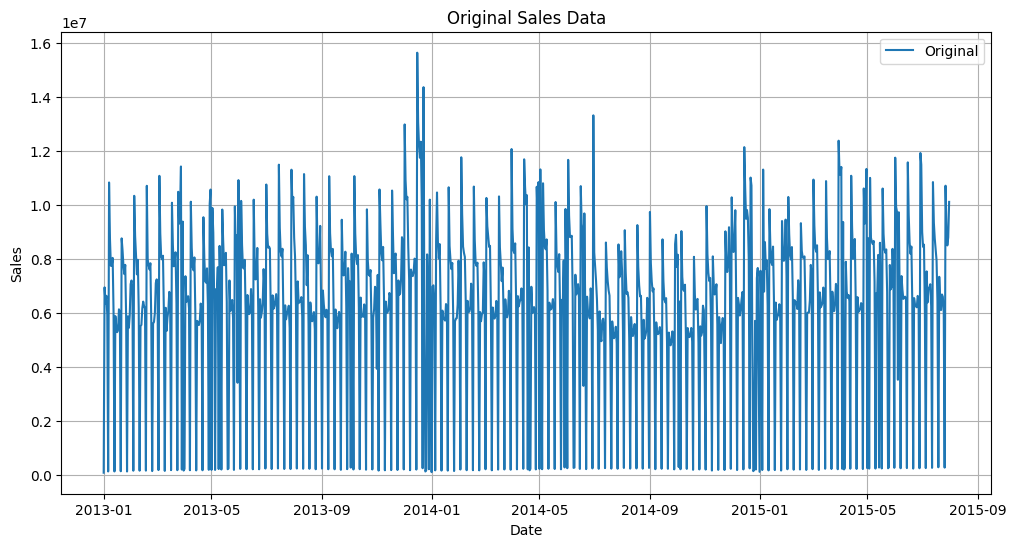

In [56]:
plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(df_sales['Sales'], label='Original')  # Plotting original sales data
plt.title('Original Sales Data')  # Adding title to the plot
plt.xlabel('Date')  # Adding label to the x-axis
plt.ylabel('Sales')  # Adding label to the y-axis
plt.legend(loc='best')  # Adding legend at the best location
plt.grid(True)  # Adding gridlines
plt.show()  # Display the plot

In [57]:
# Plot trend component

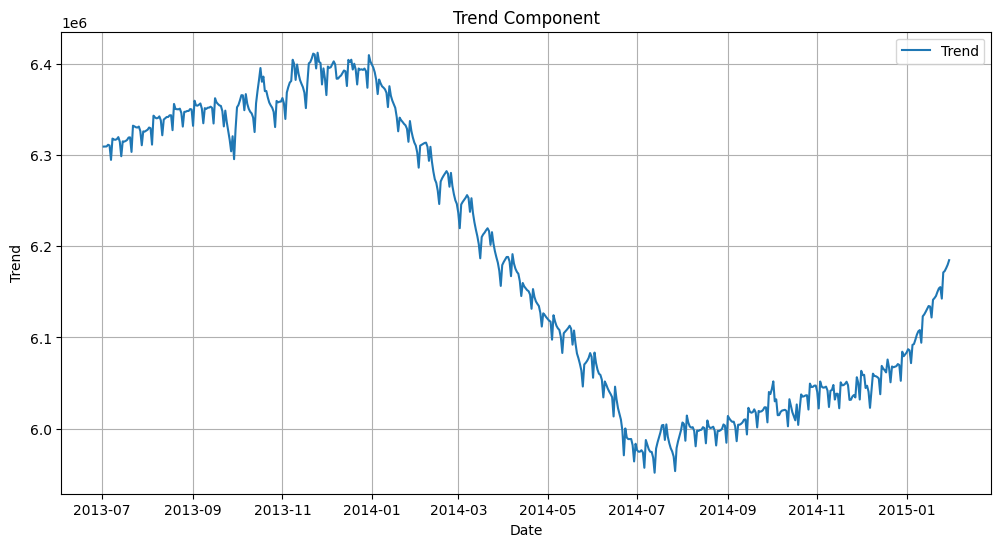

In [58]:
plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(trend, label='Trend')  # Plotting trend component
plt.title('Trend Component')  # Adding title to the plot
plt.xlabel('Date')  # Adding label to the x-axis
plt.ylabel('Trend')  # Adding label to the y-axis
plt.legend(loc='best')  # Adding legend at the best location
plt.grid(True)  # Adding gridlines
plt.show()  # Display the plot

In [59]:
# Plot seasonal component

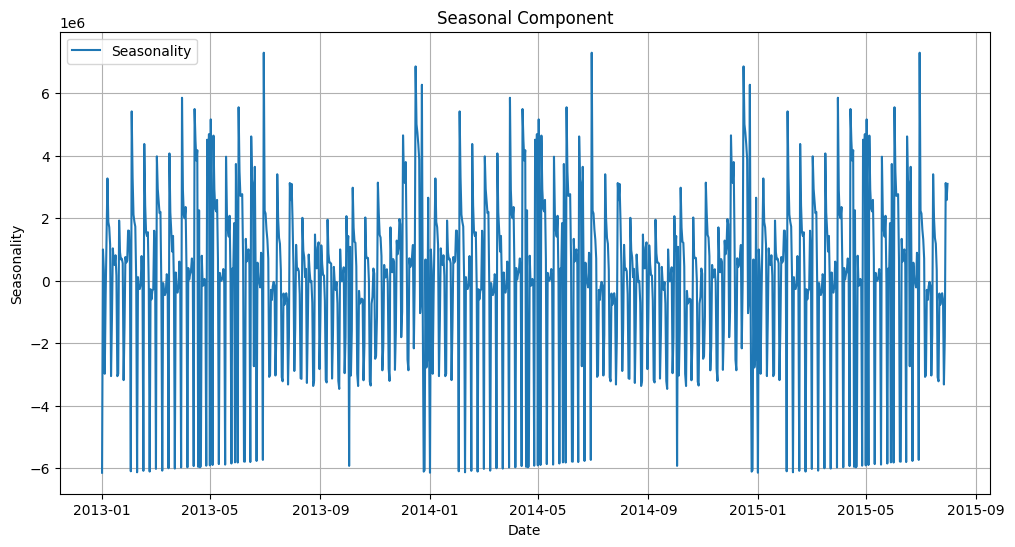

In [60]:
plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(seasonal, label='Seasonality')  # Plotting seasonal component
plt.title('Seasonal Component')  # Adding title to the plot
plt.xlabel('Date')  # Adding label to the x-axis
plt.ylabel('Seasonality')  # Adding label to the y-axis
plt.legend(loc='best')  # Adding legend at the best location
plt.grid(True)  # Adding gridlines
plt.show()  # Display the plot

In [61]:
# Plot residual component

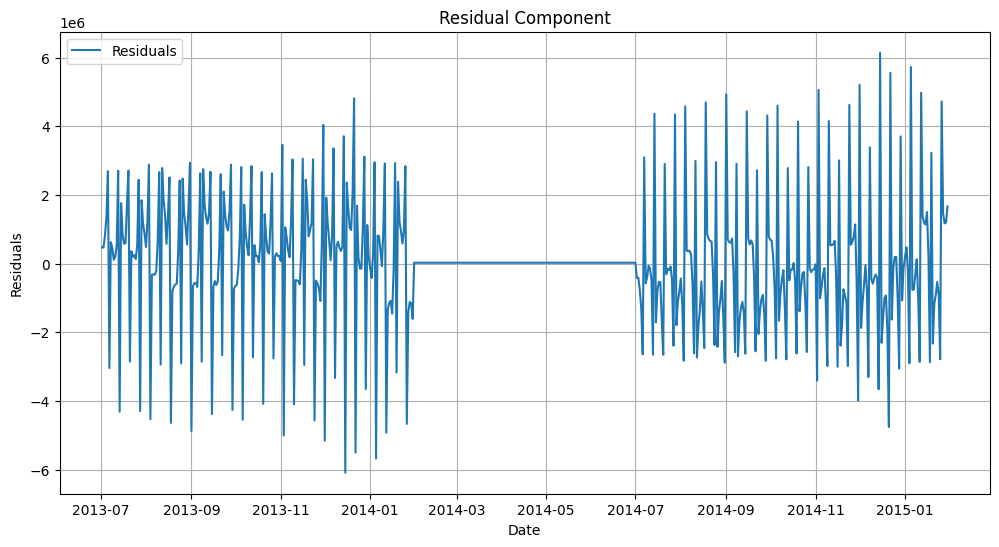

In [62]:
plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(residual, label='Residuals')  # Plotting residual component
plt.title('Residual Component')  # Adding title to the plot
plt.xlabel('Date')  # Adding label to the x-axis
plt.ylabel('Residuals')  # Adding label to the y-axis
plt.legend(loc='best')  # Adding legend at the best location
plt.grid(True)  # Adding gridlines
plt.show()  # Display the plot

#### Fit ARIMA Model for Forecasting

- **Model Selection Criteria:** Outline criteria for selecting ARIMA parameters (p, d, q) based on autocorrelation and partial autocorrelation analysis.
  - Provide guidelines for interpreting ACF and PACF plots to determine optimal ARIMA model specifications for sales forecasting.

- **Model Estimation:** Describe the process of estimating ARIMA parameters and fitting the model to historical sales data using Python.
  - Include step-by-step instructions and code examples demonstrating model fitting, parameter optimization, and model diagnostics.

- **Forecasting Methodology:** Discuss approaches for generating sales forecasts using ARIMA models, including out-of-sample forecasting and forecast evaluation techniques.
  - Provide examples of forecast visualization, uncertainty estimation (e.g., confidence intervals), and sensitivity analysis to assess forecast reliability.

- **Model Validation:** Validate ARIMA model assumptions and performance metrics (e.g., RMSE, MAPE) against actual sales data to measure forecast accuracy.
  - Interpret validation results to identify model strengths, weaknesses, and areas for refinement in sales forecasting applications.

In [63]:
# Fit ARIMA model for forecasting

In [64]:
# Split data into train and test sets

In [65]:
train_data = df_sales[:'2015-06-30']  # Training data until June 2015

In [66]:
test_data = df_sales['2015-07-01':]  # Test data from July 2015 onwards

In [67]:
# Fit ARIMA model

In [68]:
model = ARIMA(train_data, order=(5, 1, 0))  # Example order (p, d, q) = (5, 1, 0) for ARIMA model, tune as needed

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [69]:
model_fit = model.fit()  # Fit ARIMA model to the training data

In [70]:
# Forecast

In [71]:
forecast = model_fit.forecast(steps=len(test_data))  # Forecast sales for the length of test_data

In [72]:
# Calculate RMSE (Root Mean Squared Error)

In [73]:
rmse = np.sqrt(mean_squared_error(test_data, forecast))  # Calculate RMSE between actual and forecasted sales

In [74]:
print(f'RMSE for aggregated sales data: {rmse}')  # Print RMSE value

RMSE for aggregated sales data: 3238719.1609501303


In [75]:
# Plot ARIMA forecast results

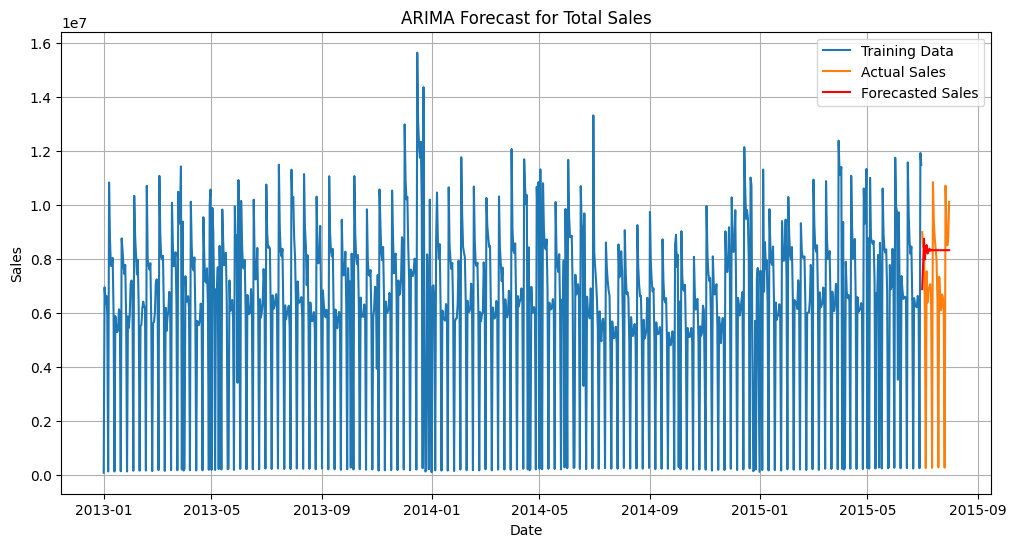

In [76]:
plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(train_data.index, train_data.values, label='Training Data')  # Plotting training data
plt.plot(test_data.index, test_data.values, label='Actual Sales')  # Plotting actual sales data
plt.plot(test_data.index, forecast, label='Forecasted Sales', color='red')  # Plotting forecasted sales
plt.title('ARIMA Forecast for Total Sales')  # Adding title to the plot
plt.xlabel('Date')  # Adding label to the x-axis
plt.ylabel('Sales')  # Adding label to the y-axis
plt.legend()  # Adding legend
plt.grid(True)  # Adding gridlines
plt.show()  # Display the plot

In [78]:
# Export forecasted sales to CSV file

In [79]:
forecasted_values = pd.DataFrame({
    'Date': test_data.index,
    'Actual_Sales': test_data['Sales'].values,
    'Forecasted_Sales': forecast
})

In [80]:
forecasted_values.to_csv('/content/forecasted_sales.csv', index=False)  # Save to CSV file


#### Summary and Conclusion

- **Project Overview:** Recap the main objectives and scope of the sales forecasting project, emphasizing the importance of accurate sales predictions for business planning and decision-making.

- **Data Loading and Preparation:** Highlight the critical steps involved in loading and preparing sales and store data for analysis, including data merging, cleaning, and handling missing values.

- **Exploratory Data Analysis (EDA):** Discuss insights gained from exploratory data analysis, such as sales trends, seasonal patterns, and correlations between variables.

- **Time Series Decomposition:** Summarize findings from time series decomposition, including identification of trend, seasonality, and residual components influencing sales dynamics.

- **ARIMA Modeling:** Provide an overview of ARIMA model fitting process, parameter selection, and forecasting results. Discuss the model's ability to capture sales trends and its limitations.

- **Forecast Evaluation:** Evaluate the accuracy of sales forecasts using metrics like RMSE and MAPE, assessing the reliability and performance of the ARIMA model.

- **Business Insights:** Extract actionable insights from sales forecasts, highlighting potential strategies for optimizing inventory management, resource allocation, and promotional planning.

- **Future Directions:** Propose recommendations for future research or enhancements to the forecasting model, such as incorporating external factors or exploring advanced machine learning techniques.

- **Conclusion:** Sum up the project outcomes, emphasizing key findings, challenges encountered, and lessons learned throughout the sales forecasting analysis. Discuss the project's impact on business decision-making and its potential for ongoing improvement.

By summarizing each aspect of the project comprehensively, this section provides a cohesive overview of the sales forecasting analysis, ensuring clarity and actionable insights for stakeholders and future researchers.